머신러닝 알고리즘은 문자열 데이터 속성을 입력 받지 않는다.
문자형 카테고리형 속성은 모두 숫자값으로 변환, 즉 인코딩 되어야 한다

#### 방법은 두 가지 -> Label 인코딩 / One-Hot 인코딩

# 레이블 인코딩(Label Encoding)

In [1]:
# 컴퓨터가 알아먹을 수 있게 (인코딩)
# 사람이 알아먹을 수 있게 (디코딩)

# Target(Label)에만 적용해야 한다.

targets = ["청바지", "치마", "청바지", "원피스", "청바지", "치마", "치마", "청바지", "원피스"]


In [2]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

위 코드는 문자열 형태의 카테고리형 데이터를 컴퓨터가 이해할 수 있는 숫자 형태로 변환하는 과정을 보여줍니다. 
구체적으로, sklearn.preprocessing 모듈의 LabelEncoder를 사용하여 타겟(Label) 데이터를 인코딩하는 예제입니다.

1. 목적:
문자열 형태의 카테고리형 데이터를 숫자형 데이터로 변환(인코딩)하여 컴퓨터가 이해할 수 있게 합니다.
이렇게 변환된 숫자형 데이터는 머신러닝 모델에 입력으로 사용될 수 있습니다.

2. 타겟 데이터 정의:
targets 리스트는 문자열 형태의 카테고리 데이터로, 각각 "청바지", "치마", "원피스"라는 값을 가지고 있습니다.
이 데이터는 머신러닝 모델의 타겟(Label) 데이터로 사용될 것입니다.

3. LabelEncoder 인스턴스 생성:
LabelEncoder 클래스는 문자열 형태의 카테고리 데이터를 숫자형 데이터로 변환하는 기능을 제공합니다.
lbl_encoder는 LabelEncoder 클래스의 인스턴스입니다.

### '전처리'라는 것은 데이터를 변형(Transformation)시키는 작업
### 데이터의 변형을 일으키는 클래스를 Transformer라고 함 (알고리즘이 아님)

* fit의 어원 = feed(먹이다)

- Estimator의 핵심 메서드로 fit / predict가 있는 것처럼
- Transformer는 핵심 메서드로 fit / transform을 가짐
--------------------------------------------------------------------
#### Estimator에게 데이터 먹이고(fit, 데이터를 적용(학습)시켜서), 데이터의 패턴을 찾아(훈련시켜서) (predict)하게 한다.
#### Transformer는 데이터 먹이고(fit, 데이터를 적용(학습)시켜서), 데이터를 변형시킬 근거를 찾아 (transform)하게 한다.


In [3]:
lbl_encoder.fit(targets)

# LabelEncoder 객체를 사용하여 주어진 타겟 데이터인 targets에 대해 인코딩 정보를 학습시키는 과정입니다.

LabelEncoder()

In [4]:
# 데이터 변형의 근거

lbl_encoder.classes_

# LabelEncoder가 학습한 고유한 클래스 레이블을 보여줍니다.
# 이 속성은 fit 메서드가 호출된 후에 사용할 수 있으며,
#  데이터의 각 고유한 카테고리 값들을 알파벳 순서 또는 숫자 순서대로 정렬된 형태로 반환합니다.


array(['원피스', '청바지', '치마'], dtype='<U3')

In [5]:
encoded_target = lbl_encoder.transform(targets)

#  LabelEncoder를 사용하여 문자열 형태의 카테고리 데이터를 숫자형 데이터로 실제로 변환하는 과정입니다. 
#  이 코드는 이전에 fit 메서드를 통해 학습한 인코딩 정보를 사용하여, 
#  주어진 targets 리스트의 각 값을 대응되는 숫자형 값으로 변환합니다.

encoded_target

array([1, 2, 1, 0, 1, 2, 2, 1, 0])

In [6]:
targets

['청바지', '치마', '청바지', '원피스', '청바지', '치마', '치마', '청바지', '원피스']

# ⭐️ One-Hot Encoding ⭐️

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder()

# OneHotEncoder는 범주형 데이터를 컴퓨터가 이해할 수 있는 숫자형 데이터로 변환하는 데 사용됩니다. 
# OneHotEncoder는 각 카테고리 값을 고유한 이진 벡터로 변환합니다. 


In [8]:
# LabelEncoder는 단일 범주형 타겟 값을 숫자형 레이블로 변환하기 때문에 1차원 배열을 사용합니다. 
# 이는 각 타겟 값이 독립적이기 때문입니다.

# OneHotEncoder는 범주형 특성 값을 이진 벡터로 변환하기 위해 2차원 배열을 사용합니다. 
# 이는 각 특성 열이 독립적인 범주형 변수로, 다중 특성을 인코딩할 수 있도록 설계되었기 때문입니다.

# 1차원 배열을 2차원 배열로 변형
# Vector를 Matrix로 변환
# R^N -> R^(N X 1) 행렬로 변형

import numpy as np

items_arr = np.array(targets).reshape(-1, 1)

# reshape(-1, 1):
# 배열의 형태를 바꿉니다. 여기서 -1은 배열의 크기에 따라 자동으로 계산되는 차원을 의미하며, 1은 열의 수를 의미합니다.

items_arr

array([['청바지'],
       ['치마'],
       ['청바지'],
       ['원피스'],
       ['청바지'],
       ['치마'],
       ['치마'],
       ['청바지'],
       ['원피스']], dtype='<U3')

In [9]:
# 범주형 데이터 학습
ohe_encoder.fit(items_arr)

# 범주형 데이터 변환
ohe_datas = ohe_encoder.transform(items_arr)

ohe_datas

<9x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [10]:
# 압축된 희소행렬 포맷

# 원-핫 인코딩 후 출력된 결과가 희소 행렬(sparse matrix) 형식으로 표시되는 이유는 
# OneHotEncoder가 기본적으로 희소 행렬을 반환하기 때문입니다. 
# 희소 행렬은 대부분의 요소가 0인 행렬을 저장하고 처리하는 효율적인 방법입니다. 
# 이 형식은 메모리를 절약하고, 계산을 효율적으로 수행할 수 있도록 도와줍니다.

print(ohe_datas)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 0)	1.0


In [11]:
# 압축된 희소행렬 형태를 풀어서 표현
ohe_datas.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

# Feature Scaling

Feature의 의미

Feature는 머신러닝에서 모델이 학습에 사용하는 개별적인 측정값 또는 속성을 의미합니다. 한마디로, 특성이라고도 합니다. 데이터셋의 각 열(column)이 하나의 특성에 해당하며, 각 특성은 예측을 수행하는 데 중요한 역할을 합니다.
예를 들어, 주택 가격 예측 모델에서 다음과 같은 특성을 사용할 수 있습니다:
면적 (square footage)
방의 개수 (number of rooms)
위치 (location)
건축 연도 (year built)
각 특성은 모델이 예측을 수행하기 위해 학습하는 데 필요한 중요한 정보입니다.

Feature Scaling의 의미

Feature Scaling은 모델 학습에 사용되는 특성 값들의 범위를 조정하는 데이터 전처리 과정입니다. 이를 통해 모든 특성 값들이 같은 스케일(범위)을 가지도록 하여, 모델이 특정 특성에 과도하게 의존하거나 영향을 받지 않도록 합니다. Feature Scaling의 주된 목적은 모델의 학습을 더 안정적이고 빠르게 만드는 것입니다.






### MinMaxScaling: 표준화 
### StandardScaling: 정규화

## MinMaxScaling(정규화)
- 0 ~ 1 사이로 정규화 시켜주는 Transformer

In [12]:
import pandas as pd

movie_score = pd.DataFrame({
    "naver":[0, 2, 4, 6, 8],
    "netflix":[1, 2, 3, 4, 5]
})

movie_score

,naver,netflix
0,0,1
1,2,2
2,4,3
3,6,4
4,8,5


In [13]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [14]:
min_max_scaler.fit(movie_score)

MinMaxScaler()

## StandardScaling (표준화)
- 데이터를 정리한다는 개념
- 흩트러진 데이터를 원점 기준으로 정리
- 평균을 0, 표준편차를 1로 변환

In [15]:
data1 = np.array([100, 110, 120, 130, 140])
data2 = np.array([0, 1, 2, 3, 4])

In [16]:
# 각 데이터의 평균
data1.mean(), data2.mean()

(120.0, 2.0)

In [17]:
# 각 데이터의 표준편차
data1.std(), data2.std()

(14.142135623730951, 1.4142135623730951)

In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler1 = StandardScaler()
std_scaler2 = StandardScaler()

In [19]:
# std_scaler1.fit(data1)
# std_scaler1.fit(data2)

# 이거 에러 나는 이유: 1차원이기 때문
# fit 2차원 배열로 해야 함

std_scaler1.fit(data1.reshape(-1, 1))
std_scaler2.fit(data2.reshape(-1, 1))


StandardScaler()

In [20]:
data1_scaled = std_scaler1.transform(data1.reshape(-1, 1))
data2_scaled = std_scaler2.transform(data2.reshape(-1, 1))

In [21]:
print(data1_scaled)
print("\n\n")
print(data1_scaled)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]



[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [22]:
data1_scaled.mean(), data2_scaled.mean()

(0.0, 0.0)

In [23]:
data1_scaled.std(), data2_scaled.std()

(0.9999999999999999, 0.9999999999999999)

아이리스 데이터 이용해 표준화 해보기

1. 원래 데이터의 평균과 분산 계산


첫 번째 코드 블록에서는 아이리스 데이터셋을 불러와서 각 피처의 평균(mean)과 분산(variance)을 계산합니다. 이 때 계산된 값들은 데이터셋의 실제 값들을 기반으로 합니다.

- 원래 데이터의 평균: 각 피처의 평균 값은 데이터를 모두 더하고 데이터의 개수로 나눈 값입니다.
- 원래 데이터의 분산: 분산은 각 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 나타내는 값입니다.

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


2. StandardScaler를 이용한 표준화 후 평균과 분산 계산

두 번째 코드 블록에서는 StandardScaler를 사용하여 데이터셋을 표준화합니다. StandardScaler는 각 피처의 값을 평균이 0, 표준 편차가 1이 되도록 변환합니다.

- 표준화(standardization): 각 피처에서 평균을 빼고 표준 편차로 나누어 값을 변환합니다. 이 변환을 통해 데이터의 평균은 0이 되고, 분산은 1이 됩니다.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


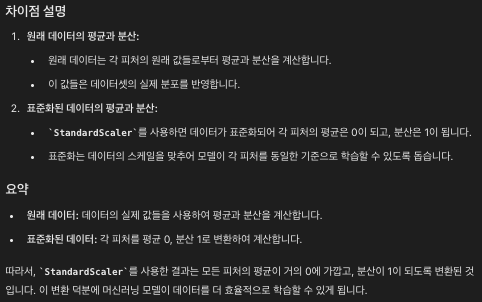